In [1]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = Path('images')

In [8]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [9]:
dls = images.dataloaders(path)

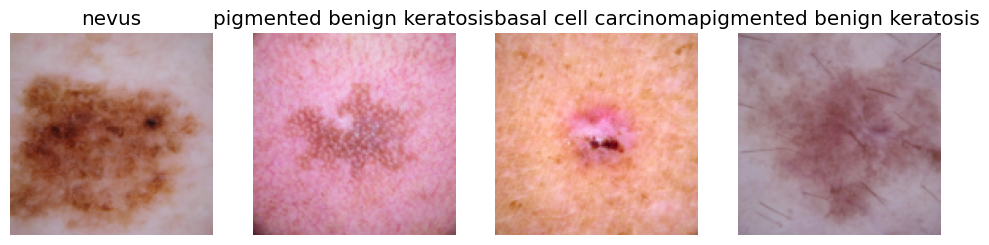

In [7]:
dls.valid.show_batch(max_n=4, nrows=1)

In [12]:
images = images.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = images.dataloaders(path)

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.824577,1.508196,0.449664,04:31


epoch,train_loss,valid_loss,error_rate,time
0,1.842900,1.221735,0.366890,06:37
1,1.627644,1.186456,0.342282,06:31
2,1.401521,1.094503,0.322148,06:34
3,1.253721,1.057509,0.319911,06:28


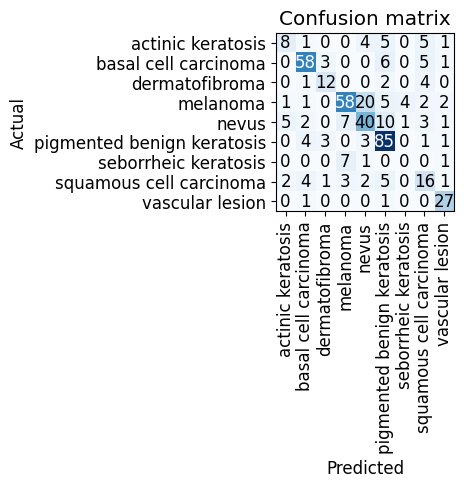

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

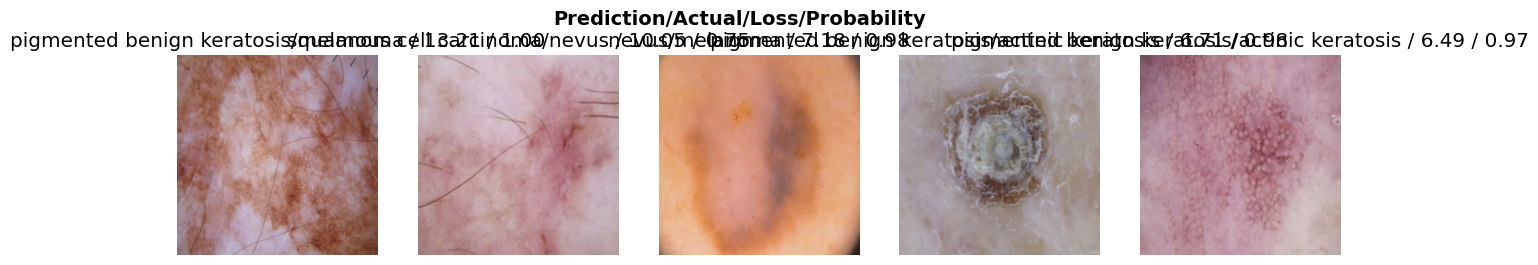

In [15]:
interp.plot_top_losses(5, nrows=1)

In [16]:
learn.export()